# Assignment 5 Dataset:

Use USF logo Images dataset for this assignment. You will have a chance to explore more on Convolution Neural Networks(CNNs) in this Assignment.

# Dataset description:

USF logo Images dataset is madeup from google images containing both old and new USF logos. This dataset contains two folders(Old logo and new logo) contains 200 images in total(100
each for each type).

# Task
Your task is to build a classifer where it can classify USF old logo or new logo given an image. you just have to build one good model


# Assignment 5 - Questions

This Assignment focuses on building CNNs and exploring the architecture of it. 

1. Load the two folders USF old and USF new to the environment
2. Create a label for each folder(USF old as old) and (USF new as new)
3. Resize the images to one size for model input
4. Create a stratified split based on the labels(80:20 split)
5. Normalize the data
6. Reshape the input data to a tensor(4d) for CNN 
7. Build a CNN Classifier model and improve it by tuning the hyper parameters
8. Explain what every layer does why was it constructed the way it is?
9. Evaluate CNN using F1 score values and accuracy(only for the best model)
10. Plot the learning curves for Model accuracy and Model loss

11. optional: Try autoencoders to reduce the dimensionality of an Image and still try to achieve that accuracy

Submit the .ipynb, and .html 


In [667]:
#Importing Libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow import keras
from numpy import asarray
import glob
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

2. Create a label for each folder(USF old as old) and (USF new as new)

In [668]:
#Reading pictures from dataset and labelling them new and old
pic_lib = r'/Users/krishnajyesta/downloads/Assignment 5'

logo_list = []

for item in os.listdir(pic_lib):
    logo_list.append(item)


extensions = ("*.jpg", "*.jpeg","*.png")

labels = []
image_arrays=[]
for logo in logo_list:
    for ext in extensions:
        for index, pic in enumerate(glob.glob(pic_lib + "/" + logo + "/" + ext), start = 1):
            originalImage = cv2.imread(pic)
            #convert to greyscale
            grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
            new_img_array = cv2.resize(grayImage, dsize=(100, 100))
            image_arrays.append(new_img_array)
            label = 1 if 'new' in logo else 0
            labels.append(label)

3. Resize the images to one size for model input

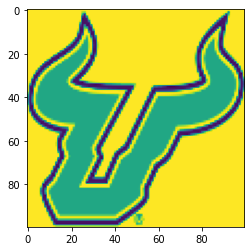

In [669]:
some_pic = image_arrays[80]
some_pic_image = some_pic.reshape(100,100)
plt.imshow(some_pic_image)
plt.show()

In [670]:
labels[70]

1

In [671]:
#Creating input and output from the arrays and labels
X_train_full = np.asarray(image_arrays)
y_train_full = np.asarray(labels)

4. Create a stratified split based on the labels(80:20 split)

In [672]:
#Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.20) 

5. Normalize the data

In [673]:
#Scaling the data
X_train, X_test = X_train / 255.0, X_test / 255.0

6.Reshape the input data to a tensor(4d) for CNN

In [674]:
#Reshaping data to 4D
X_train = X_train.reshape([-1, 100, 100, 1])
X_test = X_test.reshape([-1, 100, 100, 1])

In [675]:
#Building Basic MLP Model
model2= Sequential()
model2.add(Flatten(input_shape = (100,100,1))), 
model2.add(Dense(128, activation=tf.nn.relu)), 
model2.add(Dense(1, activation=tf.nn.sigmoid))

model2.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics='accuracy')

In [676]:
#Fitting the Model
#Using Early stopping and Model Checkpoint to get the best model monitoring validation loss
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('imgclassifier.h5', save_best_only=True, monitor='val_loss', mode='min')
history2 = model2.fit(X_train,y_train,
steps_per_epoch=2,
epochs=100,
verbose=1,
validation_split = 0.2,
validation_steps=1,
shuffle=True,
callbacks=[earlyStopping, mcp_save])

Epoch 1/100
2/2 [==============================] - 0s 65ms/step - loss: 52.7880 - accuracy: 0.5547 - val_loss: 8.5420 - val_accuracy: 0.4062
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 39.4726 - accuracy: 0.5312 - val_loss: 62.8224 - val_accuracy: 0.5938
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 66.0391 - accuracy: 0.5156 - val_loss: 28.5205 - val_accuracy: 0.5938
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 23.0519 - accuracy: 0.5391 - val_loss: 8.7450 - val_accuracy: 0.4062
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 15.0594 - accuracy: 0.4844 - val_loss: 21.4108 - val_accuracy: 0.4062
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 22.7235 - accuracy: 0.4844 - val_loss: 19.2376 - val_accuracy: 0.4062
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 19.2072 - accuracy: 0.4844 - val_loss: 13.5248 - val_accuracy: 0.4062
Epoch 8/

In [677]:
#Evaluating the Model
pred = model2.predict(X_test)
predictions = [0 if x < 0.5 else 1 for x in pred]

Model1_f1 = metrics.f1_score(y_test, predictions, average= "weighted")
Model1_accuracy = metrics.accuracy_score(y_test, predictions)
Model1_confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [678]:
#Printing metrics of MLP Model
print("--------------------------------")
print("F1 score: {}".format(Model1_f1))
print("Accuracy score: {}".format(Model1_accuracy))
print("Confusion matrix: \n", Model1_confusion_matrix)

--------------------------------
F1 score: 1.0
Accuracy score: 1.0
Confusion matrix: 
 [[15  0]
 [ 0 25]]


MLP model has the best accuracy and F1 score.

7. Build a CNN Classifier model and improve it by tuning the hyper parameters

In [679]:
#Building CNN Model
modelCNN = Sequential()

modelCNN.add(Conv2D(64,(3,3), activation = 'relu', input_shape = [100,100,1]))
modelCNN.add(MaxPooling2D(pool_size = (2,2)))

modelCNN.add(Conv2D(64,(3,3), activation = 'relu'))
modelCNN.add(MaxPooling2D(pool_size = (2,2)))

modelCNN.add(Flatten())
modelCNN.add(Dense(64, activation='relu'))

modelCNN.add(Dense(1, activation='sigmoid'))

modelCNN.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics='accuracy')

8. Explain what every layer does why was it constructed the way it is?

Layers in the CNN:
- INPUT [100x100x1] will hold the raw pixel values of the image, in this case an image of width 100, height 100, and one channel.
- CONV layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. 
- RELU layer will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged.
- POOL layer will perform a downsampling operation along the spatial dimensions (2, 2).
- FLATTEN is the function that converts the pooled feature map to a single column that is passed to the fully connected layer. 
- DENSE adds the fully connected layer to the neural network.

In [680]:
#Fitting the model
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('imgclassifier.h5', save_best_only=True, monitor='val_loss', mode='min')
history = modelCNN.fit(X_train,y_train,
steps_per_epoch=2,
epochs=100,
verbose=1,
validation_split = 0.2,
validation_steps=1,
shuffle=True,
callbacks=[earlyStopping, mcp_save])

Epoch 1/100
2/2 [==============================] - 1s 305ms/step - loss: 5.3531 - accuracy: 0.4297 - val_loss: 9.1583 - val_accuracy: 0.5938
Epoch 2/100
2/2 [==============================] - 1s 265ms/step - loss: 6.5156 - accuracy: 0.5156 - val_loss: 0.7208 - val_accuracy: 0.5312
Epoch 3/100
2/2 [==============================] - 1s 268ms/step - loss: 0.6952 - accuracy: 0.6016 - val_loss: 0.6607 - val_accuracy: 0.6875
Epoch 4/100
2/2 [==============================] - 1s 261ms/step - loss: 0.6573 - accuracy: 0.7891 - val_loss: 0.5293 - val_accuracy: 0.8438
Epoch 5/100
2/2 [==============================] - 0s 241ms/step - loss: 0.7602 - accuracy: 0.7031 - val_loss: 0.7428 - val_accuracy: 0.5938
Epoch 6/100
2/2 [==============================] - 1s 263ms/step - loss: 0.6561 - accuracy: 0.7109 - val_loss: 0.4685 - val_accuracy: 0.7812
Epoch 7/100
2/2 [==============================] - 1s 264ms/step - loss: 0.6132 - accuracy: 0.6641 - val_loss: 0.3839 - val_accuracy: 0.8125
Epoch 8/100
2

Tuned learning rate,number of epochs,steps for CNN model and below is the best CNN model.

In [681]:
pred = modelCNN.predict(X_test)
predictions = [0 if x < 0.5 else 1 for x in pred]

ModelCNN_f1 = metrics.f1_score(y_test, predictions, average= "weighted")
ModelCNN_accuracy = metrics.accuracy_score(y_test, predictions)
ModelCNN_confusion_matrix = metrics.confusion_matrix(y_test, predictions)

9. Evaluate CNN using F1 score values and accuracy(only for the best model)

In [682]:
#Printing metrics of CNN Model
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(ModelCNN_f1))
print("Accuracy score: {}".format(ModelCNN_accuracy))
print("Confusion matrix: \n", ModelCNN_confusion_matrix)

-----------------Convolutional Neural Network Report---------------
F1 score: 1.0
Accuracy score: 1.0
Confusion matrix: 
 [[15  0]
 [ 0 25]]


**From the above evaluation matrics we can see that the accuracy is 100%**

In [683]:
#Printing metrics of MLP Model
print("--------------------------------")
print("F1 score: {}".format(Model1_f1))
print("Accuracy score: {}".format(Model1_accuracy))
print("Confusion matrix: \n", Model1_confusion_matrix)

--------------------------------
F1 score: 1.0
Accuracy score: 1.0
Confusion matrix: 
 [[15  0]
 [ 0 25]]


**From the above evaluation matrics we can see that the accuracy for the MLP model is 100%.**

10. Plot the learning curves for Model accuracy and Model loss

Plotting Accuracy and loss curves

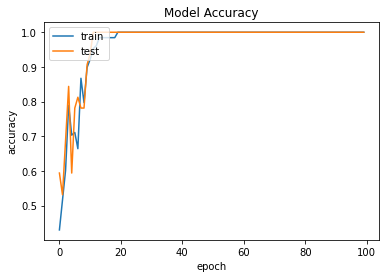

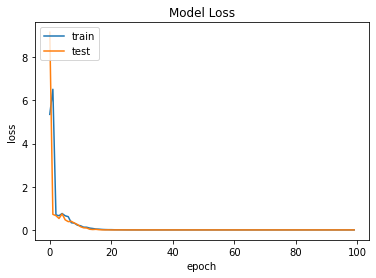

In [684]:
# Plotting Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Plotting Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plotting learning curves for MLP Model

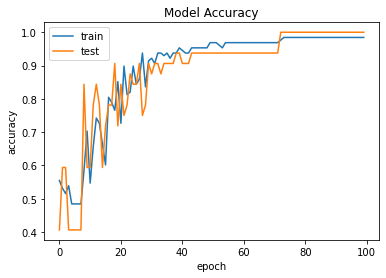

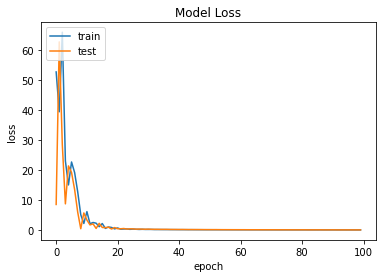

In [685]:
# Plotting Model accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Plotting Model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()